# Análise Exploratória de Dados
* **Autor:** Lavínia Caldas


* **Objetivo:** Definir um conjunto de dados a fim de analisar a sua consistência e estudar de forma estatística as informações presentes.

* **Dataset:** Irís ([Link](https://archive.ics.uci.edu/dataset/53/iris))
* **Descrição:** Um conjunto de dados para classificação entre 3 tipos de plantas.
* **Classes:** 
    * Iris Setosa
    * Iris Versicolor
    * Iris Virgínica.
* **Atributos:** 
    * Comprimento da sépala
    * Largura da sépala
    * Comprimento da pétala
    * Largura da pétala.

* **Sumário:**

    1. Obtenção dos Dados
        1. Importação das Bibliotecas
        2. Leitura dos Atributos
    2. Análise Exploratória dos Dados
        1. Métrica de Posição
        2. Métrica de Dispersão
        3. Associação entre Variáveis
    3. Conclusões 
        1. Trabalhos Futuros


## 1. Obtenção dos Dados

###  1.1. Importação das Bibliotecas

In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

### 1.2. Leitura dos Atributos

In [2]:
data = pd.read_csv("iris.data", header=None)
data.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
setosa = data[data[4] == 'Iris-setosa'].iloc[:, 0:4]
versicolor = data[data[4] == 'Iris-versicolor'].iloc[:, 0:4]
virginica = data[data[4] == 'Iris-virginica'].iloc[:, 0:4]

In [4]:
setosa.shape, versicolor.shape, virginica.shape

((50, 4), (50, 4), (50, 4))

## 2. Análise Exploratória dos Dados

### 2.1. Métrica de Posição

##### 2.1.1 Analisando média:

Somente com a média dos atributos, é possível perceber que a espécia **setosa** segue um padrão "decrescente". Assim, o tamanho do atributos seguem nessa ordem: comprimento da sépala > largura da sépala > comprimento da pétala > largura da péetala. Esse padrão difere das outras duas espécies. 

Além disso, é possível notar que essa espécie tem os valores de média por si só mais distantes dos outros, indicando que é classe é mais fácil de ser identificada pelo valor de média e pela relação de grandeza entre os atributos.


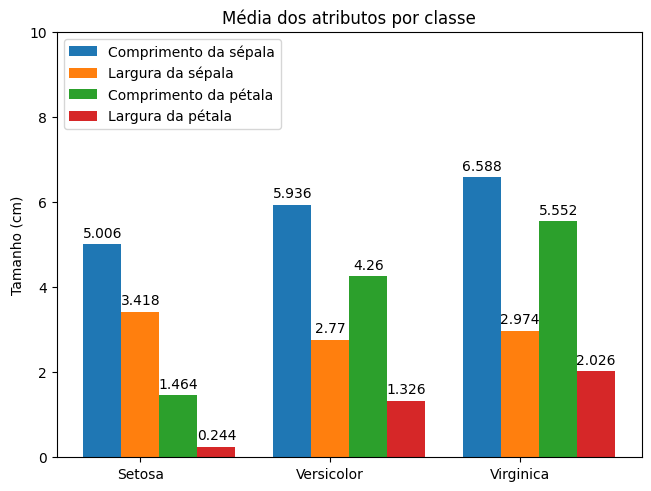

In [44]:
classes = ("Setosa", "Versicolor", "Virginica")
medias = {
    'Comprimento da sépala': (setosa.mean()[0], versicolor.mean()[0], virginica.mean()[0]),
    'Largura da sépala': (setosa.mean()[1], versicolor.mean()[1], virginica.mean()[1]),
    'Comprimento da pétala': (setosa.mean()[2], versicolor.mean()[2], virginica.mean()[2]),
    'Largura da pétala': (setosa.mean()[3], versicolor.mean()[3], virginica.mean()[3])
}

posicoes = np.arange(len(classes))  
largura = 0.2
mulplicador = 0

fig, ax = plt.subplots(layout='constrained')

for atributo, medida in medias.items():
    distancia = largura * mulplicador
    rects = ax.bar(posicoes + distancia, medida, largura, label=atributo)
    ax.bar_label(rects, padding=3)
    mulplicador += 1

ax.set_ylabel('Tamanho (cm)')
ax.set_title('Média dos atributos por classe')
ax.set_xticks(posicoes + largura, classes)
ax.legend(["Comprimento da sépala","Largura da sépala","Comprimento da pétala","Largura da pétala"], loc= 'upper left')
ax.set_ylim(0, 10)


plt.show()

##### 2.1.2. Analisando mediana:

Com a mediana, percebemos as mesmas características e conclusões retiradas a partir da média.

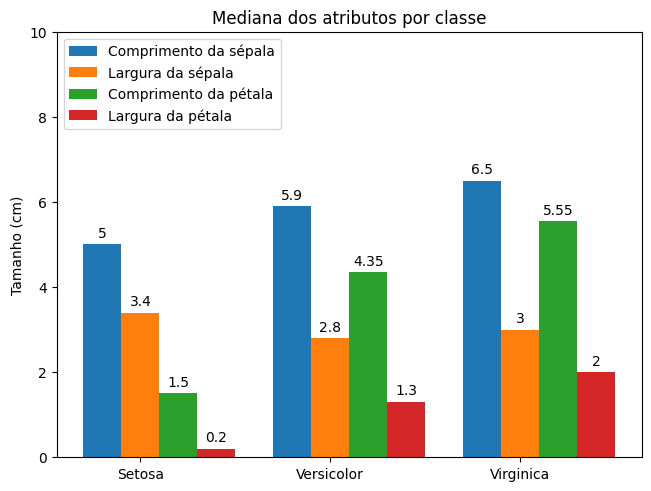

In [23]:
classes = ("Setosa", "Versicolor", "Virginica")
medianas = {
    'Comprimento da sépala': (setosa.median()[0], versicolor.median()[0], virginica.median()[0]),
    'Largura da sépala': (setosa.median()[1], versicolor.median()[1], virginica.median()[1]),
    'Comprimento da pétala': (setosa.median()[2], versicolor.median()[2], virginica.median()[2]),
    'Largura da pétala': (setosa.median()[3], versicolor.median()[3], virginica.median()[3])
}

posicoes = np.arange(len(classes))  
largura = 0.2
mulplicador = 0

fig, ax = plt.subplots(layout='constrained')

for atributo, medida in medianas.items():
    distancia = largura * mulplicador
    rects = ax.bar(posicoes + distancia, medida, largura, label=atributo)
    ax.bar_label(rects, padding=3)
    mulplicador += 1

ax.set_ylabel('Tamanho (cm)')
ax.set_title('Mediana dos atributos por classe')
ax.set_xticks(posicoes + largura, classes)
ax.legend(["Comprimento da sépala","Largura da sépala","Comprimento da pétala","Largura da pétala"], loc= 'upper left')
ax.set_ylim(0, 10)


plt.show()

##### 2.1.3. Analisando a Moda:

O mesmo também ocorre para a moda. Nesse último caso, é interessante notar que o valores de média, mediana e moda são bem próximos quando olhamos para uma mesma classe e um mesmo atributo:

> média ~= mediana ~= moda

Assim, em seguida, iremos analisar a distribuição de probabilidade dessas variáveis e compará-las com uma **distribuição gaussiana** que, além de possuir uma grande ocorrência na natureza, também segue essa característica mostrada acima. 

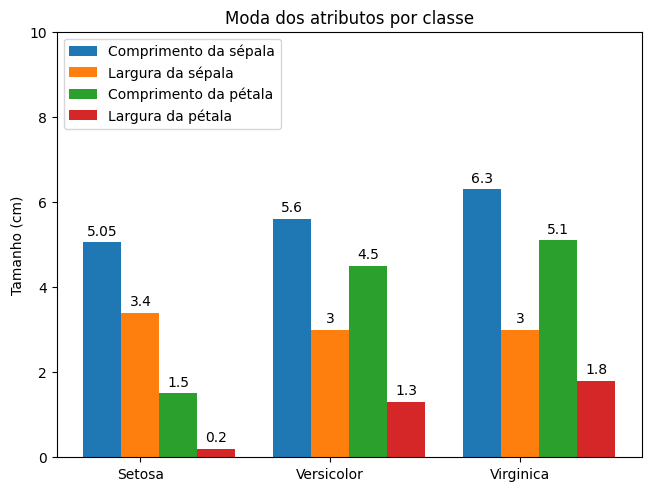

In [45]:
classes = ("Setosa", "Versicolor", "Virginica")
modas = {
    'Comprimento da sépala': (setosa.mode().mean()[0], versicolor.mode().mean()[0], virginica.mode().mean()[0]),
    'Largura da sépala': (setosa.mode().mean()[1], versicolor.mode().mean()[1], virginica.mode().mean()[1]),
    'Comprimento da pétala': (setosa.mode().mean()[2], versicolor.mode().mean()[2], virginica.mode().mean()[2]),
    'Largura da pétala': (setosa.mode().mean()[3], versicolor.mode().mean()[3], virginica.mode().mean()[3])
}

posicoes = np.arange(len(classes))  
largura = 0.2
mulplicador = 0

fig, ax = plt.subplots(layout='constrained')

for atributo, medida in modas.items():
    distancia = largura * mulplicador
    rects = ax.bar(posicoes + distancia, medida, largura, label=atributo)
    ax.bar_label(rects, padding=3)
    mulplicador += 1

ax.set_ylabel('Tamanho (cm)')
ax.set_title('Moda dos atributos por classe')
ax.set_xticks(posicoes + largura, classes)
ax.legend(["Comprimento da sépala","Largura da sépala","Comprimento da pétala","Largura da pétala"], loc= 'upper left')
ax.set_ylim(0, 10)


plt.show()

### 2.2. Métrica de Dispersão

### 2.3. Associação entre Variáveis

## 3. Conclusões

### 3.1 Trabalhos Futuros

<AxesSubplot:xlabel='0', ylabel='Count'>

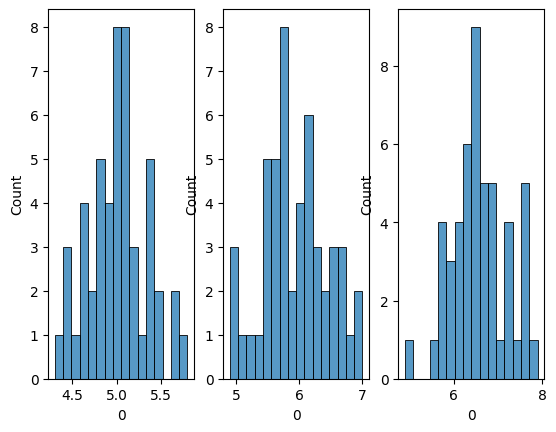

In [15]:
plt.subplot(131)
sn.histplot(data[0][data[4] == 'Iris-setosa'], bins=16)

plt.subplot(132)
sn.histplot(data[0][data[4] == 'Iris-versicolor'], bins=16)

plt.subplot(133)
sn.histplot(data[0][data[4] == 'Iris-virginica'], bins=16)



<AxesSubplot:xlabel='1', ylabel='Count'>

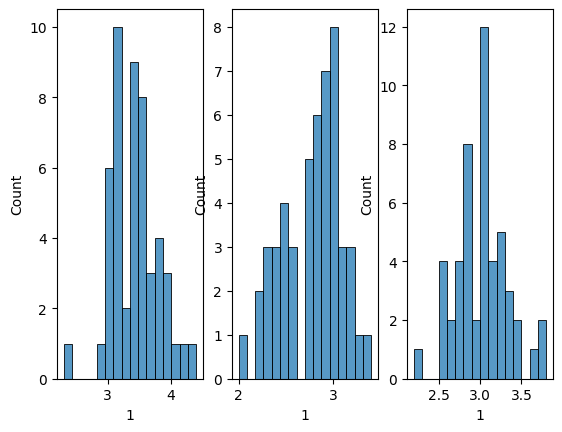

In [16]:
plt.subplot(131)
sn.histplot(data[1][data[4] == 'Iris-setosa'], bins=16)

plt.subplot(132)
sn.histplot(data[1][data[4] == 'Iris-versicolor'], bins=16)

plt.subplot(133)
sn.histplot(data[1][data[4] == 'Iris-virginica'], bins=16)



<AxesSubplot:xlabel='2', ylabel='Count'>

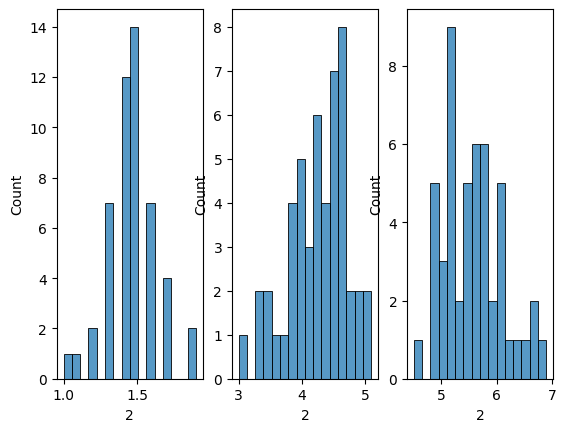

In [17]:
plt.subplot(131)
sn.histplot(data[2][data[4] == 'Iris-setosa'], bins=16)

plt.subplot(132)
sn.histplot(data[2][data[4] == 'Iris-versicolor'], bins=16)

plt.subplot(133)
sn.histplot(data[2][data[4] == 'Iris-virginica'], bins=16)



<AxesSubplot:xlabel='3', ylabel='Count'>

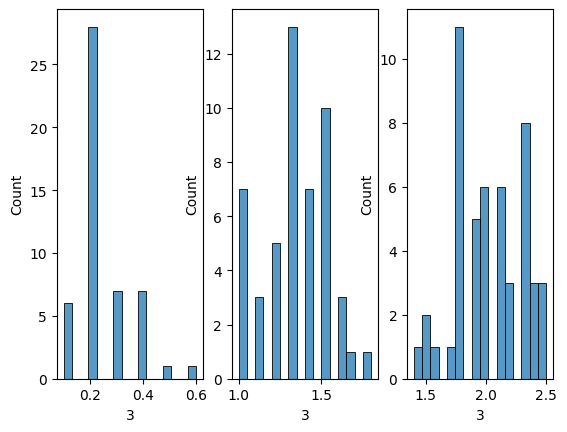

In [18]:
plt.subplot(131)
sn.histplot(data[3][data[4] == 'Iris-setosa'], bins=16)

plt.subplot(132)
sn.histplot(data[3][data[4] == 'Iris-versicolor'], bins=16)

plt.subplot(133)
sn.histplot(data[3][data[4] == 'Iris-virginica'], bins=16)



In [ ]:
pd.Series.mean(data[0][data[4] == 'Iris-versicolor']), pd.Series.mean(data[0][data[4] == 'Iris-virginica'])